In [157]:
##This file showcases UG's vehicle top speed statistics##
##First, we will import the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [59]:
vehicles = pd.read_csv("C:\\Users\\rzdat\\OneDrive\\Desktop\\UG Database\\Vehicle_data.csv")

In [60]:
vehicles.head()

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44 km/h
1,6578,vc_admiral,Admiral,Car (0),Rich (2),163.44 km/h
2,445,admiral,Admiral,Car (0),Rich (2),163.44 km/h
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84 km/h
4,25485,mplc_fireheli,Air Firetruck,Helicopter (3),Normal (0),237.84 km/h


In [61]:
cars = vehicles.query("`VEHICLE TYPE`=='Car (0)'")

In [ ]:
##Since TOP SPEED is considered object and not float, we will need to delete the km/h and convert it from object to float64
cars["TOP SPEED"] = cars["TOP SPEED"].str.replace('km/h', '').astype(float)

In [93]:
fastest_cars = cars.sort_values("TOP SPEED", ascending = False).head(10)

In [94]:
##Let's check if the conversion is successful
fastest_cars.dtypes

MODEL ID           int64
MODEL NAME        object
GXT NAME          object
VEHICLE TYPE      object
VEHICLE CLASS     object
TOP SPEED        float64
dtype: object

In [121]:
##Done, we can now create the graph for this data query
fastest_cars

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
596,25416,mp_f1b,Sonic,Car (0),Normal (0),250.00
597,25415,mp_f1a,Sonic,Car (0),Normal (0),250.00
595,25417,mp_f1c,Sonic,Car (0),Normal (0),250.00
167,6664,vc_countach,Countcash,Car (0),Executive (3),239.04
324,6615,vc_infernus,Infernus,Car (0),Executive (3),238.08
325,6561,lc_infernus,Infernus,Car (0),Executive (3),226.56
326,411,infernus,Infernus,Car (0),Executive (3),221.04
176,4790,lcs_deimos,Deimos SP,Car (0),Executive (3),221.04
643,25411,mp_tahomar,Tahoma Racer,Car (0),Normal (0),214.32
497,4803,ug_stanier_r,Premier Racer,Car (0),Normal (0),214.32


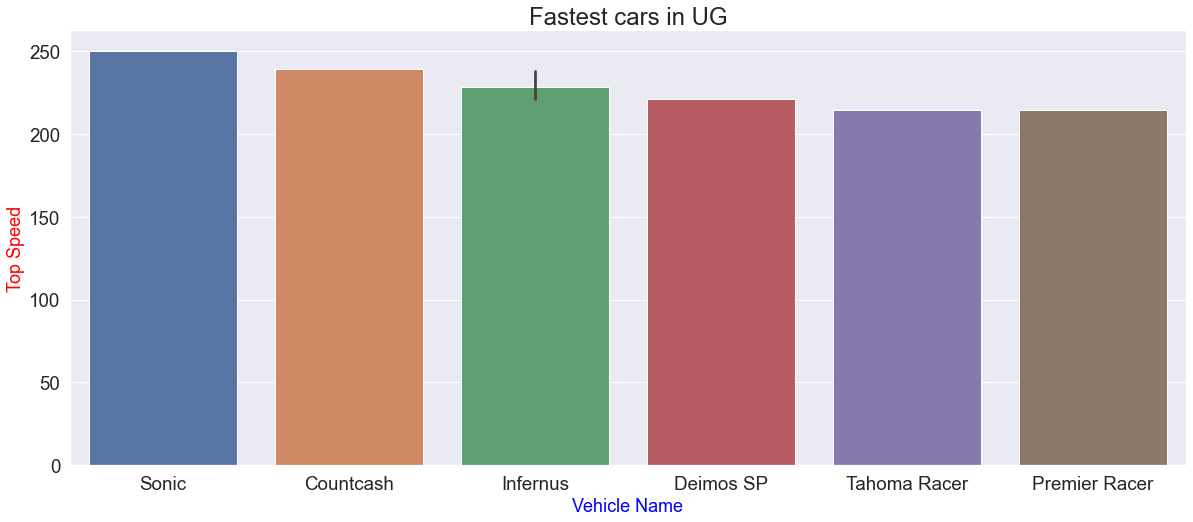

In [118]:
##Now lets create the graph that showcases the fastest vehicles of type 0 (Car)
plt.figure(figsize = (20,8))
sns.set(font_scale=1.7)
sns.set_style('darkgrid')
sns.barplot(x = 'GXT NAME', y = "TOP SPEED", data = fastest_cars)
plt.title("Fastest cars in UG", fontsize = 24)
plt.xlabel("Vehicle Name", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [122]:
cars

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44
1,6578,vc_admiral,Admiral,Car (0),Rich (2),163.44
2,445,admiral,Admiral,Car (0),Rich (2),163.44
6,6763,bw_airmax,Airmaster,Car (0),Normal (0),140.16
10,602,alpha,Alpha,Car (0),Executive (3),168.72
...,...,...,...,...,...,...
725,662,lc_yardie,Yardie Lobo,Car (0),Executive (3),175.20
727,554,yosemite,Yosemite,Car (0),Normal (0),143.52
728,798,vc_zebra,Zebra,Car (0),Taxi (6),148.80
729,25557,mw_zion,Zion,Car (0),Rich (2),174.24


In [142]:
plotorder = ["Normal (0)", "Poor (1)", "Rich (2)", "Executive (3)", "Worker (4)", "Big (5)", "Taxi (6)"]

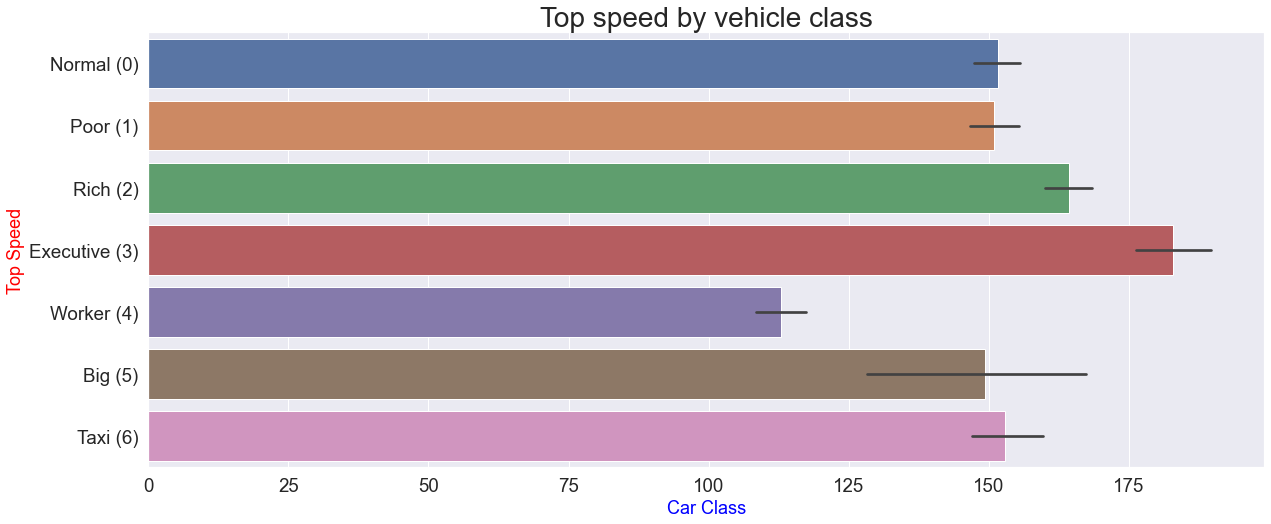

In [174]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.barplot(y = 'VEHICLE CLASS', x = "TOP SPEED", data = cars, order = plotorder)
plt.title("Top speed by vehicle class", fontsize = 28)
plt.xlabel("Car Class", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [158]:
vehicles["VEHICLE TYPE"].head(10)

0           Car (0)
1           Car (0)
2           Car (0)
3    Helicopter (3)
4    Helicopter (3)
5    Helicopter (3)
6           Car (0)
7         Plane (4)
8         Plane (4)
9         Plane (4)
Name: VEHICLE TYPE, dtype: object

In [163]:
vehicles.drop_duplicates(subset = "VEHICLE TYPE")

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44 km/h
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84 km/h
7,3248,airtrain,Airtrain,Plane (4),Normal (0),94.8004 km/h
11,6788,vcs_speeder,Ambassador,Boat (5),Boat - leisure (9),76.8003 km/h
21,25641,vcs_angel,Angel,Bike (9),Motorcycle (8),165.36 km/h
28,435,artict1,Articulated Trailer 1,Trailer (11),Normal (0),141.84 km/h
66,25505,bw_bmxs,Bike,BMX (10),Bicycle (11),85.6802 km/h
110,570,streakc,Brown Streak,Train (6),Normal (0),129.84 km/h
194,406,dumper,Dumper,Monstertruck (1),Worker (4),110 km/h
504,25517,vcs_quad,Quadbike,Quad (2),Normal (0),115.2 km/h


In [175]:
vehicletypes = ["Car (0)", "Monstertruck (1)", "Quad (2)", "Helicopter (3)", "Plane (4)", "Boat (5)", "Train (6)", "Bike (9)", "BMX (10)", "Trailer (11)"]

In [ ]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.lineplot(x = 'VEHICLE TYPE', y = "TOP SPEED", data = cars)
plt.title("Top speed by vehicle class", fontsize = 28)
plt.xlabel("Car Class", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()